### Assignment 1 - Exploring and Visualizing Data<Br>
**MSDS 422**<Br>
**Prepared by Vincent Pun**<Br>

**Background Materials**<br>
COVID 19 is an ongoing threat.  Data for the outbreak are available here:  https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide (Links to an external site.)

Using this data, you are to conduct exploratory data analysis.  Provide appropriate descriptive statistics  / visualizations to help understand the spread of the disease (incidence) as well as its fatality rate.  You should also engage in feature creation and variable transformation.  At a bare minimum, feature creation should include generating rates per X in the population (i.e., rates per million).  Investigate time series as well as univariate and bivariate distribution graphs. 

Select one of variable and perform both min-max and standard scaling in Python.  See https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py (Links to an external site.)

 (Some methods we will learn in this course  (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale. It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.)
 
 **Management Questions**<br>
 What are the management and analytical questions associated with this problem?
 
 **Grading**<Br>
 Data preparation (10 points)<br>
Data exploration (10 points)<br>
Data visualization (10 points)<br>
Data scaling and comparisons (10 points)<br>
Insights from analysis (10 points)<br>
    
**Deliverables and File Formats**<Br>
Provide a double-spaced paper with a two-page maximum for the text. The paper should include all a discussion of all graded elements but focus particularly on insights. Include your Python code and output as an appendix.    Upload this as a single .pdf file.

### Data Preparation

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Imports
import os
import pandas as pd
import seaborn as sns
import numpy as np

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
os.getcwd()

'/Users/vincentpun/Documents/Northwestern/MSDS 422/Module 1/Assignment 1 - COVID EDA - Exploring and Visualizing Data'

In [3]:
df=pd.read_csv('data.csv')

#.head()
df.head()

df.describe()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,27/06/2020,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
1,26/06/2020,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
2,25/06/2020,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia
3,24/06/2020,24,6,2020,338,20,Afghanistan,AF,AFG,38041757.0,Asia
4,23/06/2020,23,6,2020,310,17,Afghanistan,AF,AFG,38041757.0,Asia


,day,month,year,cases,deaths,popData2019
count,26144.000000,26144.000000,26144.000000,26144.000000,26144.000000,2.608000e+04
mean,16.011475,4.165927,2019.997437,373.736001,18.891447,4.705540e+07
std,8.674596,1.550983,0.050559,2129.615082,121.901395,1.679260e+08
min,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,8.150000e+02
25%,9.000000,3.000000,2020.000000,0.000000,0.000000,1.919968e+06
50%,16.000000,4.000000,2020.000000,4.000000,0.000000,8.858775e+06
75%,23.000000,5.000000,2020.000000,66.000000,1.000000,3.194979e+07
max,31.000000,12.000000,2020.000000,54771.000000,4928.000000,1.433784e+09


**Confirm that date and time are accurate (dateRep, day, month, year)**

In [4]:
#convert dtype - dateRep - object to datetime
df['dateRep'] = pd.to_datetime(df['dateRep'])

In [5]:
#unique values per date column
df['year'].unique()
df['month'].unique()
df['day'].unique()

array([2020, 2019])

array([ 6,  5,  4,  3,  2,  1, 12])

array([27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11,
       10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 31, 30, 29, 28])

In [6]:
#dateRep Accuracy

#default datetime format is YYYY-MM-DD

#earliest instance of data
df['dateRep'].min()

#most recent instance of data
max(df['dateRep'])

#December 6 2020 did not happen yet
df_testdate = df[df['dateRep']=="2020-12-06"]
df_testdate.head(2)

Timestamp('2019-12-31 00:00:00')

Timestamp('2020-12-06 00:00:00')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
15,2020-12-06,12,6,2020,747,21,Afghanistan,AF,AFG,38041757.0,Asia
185,2020-12-06,12,6,2020,44,1,Albania,AL,ALB,2862427.0,Europe


In [7]:
#convert to str
df['day']= df['day'].astype(str)
df['month']= df['month'].astype(str)
df['year']= df['year'].astype(str)

df['dateRep'] = df['year'] + '-' + df['month'] + '-' + df['day']

#convert dtype - dateRep - object to datetime
df['dateRep'] = pd.to_datetime(df['dateRep'])

#convert to int
df['day']= df['day'].astype(int)
df['month']= df['month'].astype(int)
df['year']= df['year'].astype(int)

#confirm dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26144 entries, 0 to 26143
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  26144 non-null  datetime64[ns]
 1   day                      26144 non-null  int64         
 2   month                    26144 non-null  int64         
 3   year                     26144 non-null  int64         
 4   cases                    26144 non-null  int64         
 5   deaths                   26144 non-null  int64         
 6   countriesAndTerritories  26144 non-null  object        
 7   geoId                    26039 non-null  object        
 8   countryterritoryCode     26080 non-null  object        
 9   popData2019              26080 non-null  float64       
 10  continentExp             26144 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 2.2+ MB


In [8]:
#max date is now a valid date (June 27, 2020)
#min date unchanged 
min(df['dateRep'])
max(df['dateRep'])

Timestamp('2019-12-31 00:00:00')

Timestamp('2020-06-27 00:00:00')

**Identify Missing Data**

In [9]:
df.count()

dateRep                    26144
day                        26144
month                      26144
year                       26144
cases                      26144
deaths                     26144
countriesAndTerritories    26144
geoId                      26039
countryterritoryCode       26080
popData2019                26080
continentExp               26144
dtype: int64

In [10]:
#how many blanks
df.isnull().sum().sum()

233

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 1.0, 'Percent Missing Data by Feature')

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Percent of Missing Values')

,Total,Percent
geoId,105,0.004016
popData2019,64,0.002448
countryterritoryCode,64,0.002448
continentExp,0,0.000000
countriesAndTerritories,0,0.000000
deaths,0,0.000000
cases,0,0.000000
year,0,0.000000
month,0,0.000000
day,0,0.000000


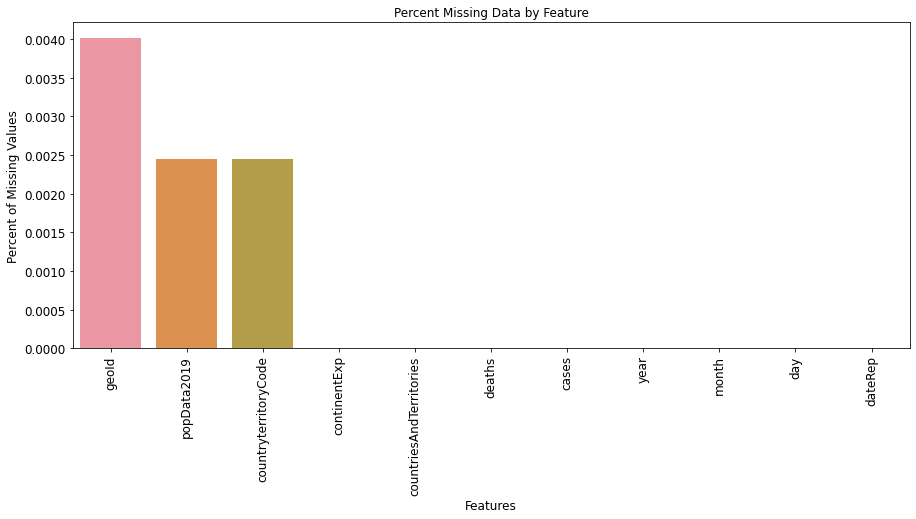

In [11]:
total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))

plt.xticks(rotation='90')

sns.barplot(x=missing_data.index, 
            y=missing_data['Percent'])

#plt title
plt.title('Percent Missing Data by Feature', fontsize=12)

#plt x y labels
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percent of Missing Values', fontsize=12)

#Missing Data
missing_data

**Drop Columns**

In [12]:
#Drop Columns (geoId, countryterritoryCode)
df.drop(['geoId','countryterritoryCode'], axis = 1, inplace=True)

**Confirm Consistency of popData2019 (because data is in 1NF)**

In [13]:
mytable = df.groupby(['countriesAndTerritories','popData2019','continentExp']).size().sort_values(ascending=False)

mytable.drop_duplicates(inplace=True)

In [14]:
duplicatedrowsDF = mytable[mytable.duplicated()]

#duplicatedrowsDF should be empty (means there are no instances of countries having varying popData2019 values)
if duplicatedrowsDF.empty == True:
    print('DataFrame is empty')
else: 
    print('DataFrame is not empty. Please review duplicatedrowsDF')

DataFrame is empty


**Cleaned Data**

In [15]:
#Cleaned data
df2 = df.copy()
df2.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,popData2019,continentExp
0,2020-06-27,27,6,2020,276,8,Afghanistan,38041757.0,Asia
1,2020-06-26,26,6,2020,460,36,Afghanistan,38041757.0,Asia
2,2020-06-25,25,6,2020,234,21,Afghanistan,38041757.0,Asia
3,2020-06-24,24,6,2020,338,20,Afghanistan,38041757.0,Asia
4,2020-06-23,23,6,2020,310,17,Afghanistan,38041757.0,Asia


In [16]:
#countryinfo
#contains country name, population, and continent
countryinfo = df2.copy()
countryinfo.drop(['dateRep','day','month','year','deaths','cases'], axis = 1, inplace=True)
countryinfo.drop_duplicates(keep='first',inplace=True)
countryinfo.head()

,countriesAndTerritories,popData2019,continentExp
0,Afghanistan,38041757.0,Asia
170,Albania,2862427.0,Europe
281,Algeria,43053054.0,Africa
456,Andorra,76177.0,Europe
562,Angola,31825299.0,Africa


### Data Exploration, Visualization, Scaling, and Comparisons

In [17]:
#Total Cases
print('Total cases equals','{:,}'.format(df2['cases'].sum()))

#Total Deaths
print('Total deaths equals','{:,}'.format(df2['deaths'].sum()))

Total cases equals 9,770,954
Total deaths equals 493,898


In [18]:
#Country and Date
CountryCaseDeathByDate = df2.groupby(['countriesAndTerritories','dateRep']).sum()

#Drop Columns
CountryCaseDeathByDate.drop(['popData2019'], axis = 1, inplace=True)

In [19]:
#Total Cases and Deaths by Country
TotCountryCases = df2['cases'].groupby(df2['countriesAndTerritories']).sum().sort_values(ascending=False)
TotCountryDeaths = df2['deaths'].groupby(df2['countriesAndTerritories']).sum().sort_values(ascending=False)

#pd.DataFrame
CountryByDate = pd.DataFrame(CountryCaseDeathByDate).reset_index()
CountryCases = pd.DataFrame(TotCountryCases, columns = ['cases']).reset_index()
CountryDeaths = pd.DataFrame(TotCountryDeaths, columns = ['deaths']).reset_index()

In [20]:
#Can use this dataframe to observe cases and deaths over time
print("CountryByDate (Useful for observing cases and deaths over time)")

#Pandas groupby cumulative sum
CountryByDate['cases_cumulative'] = CountryByDate.groupby(['countriesAndTerritories'])['cases'].apply(lambda x: x.cumsum())
CountryByDate['deaths_cumulative'] = CountryByDate.groupby(['countriesAndTerritories'])['deaths'].apply(lambda x: x.cumsum())

#Join Country Info
CountryCaseDeathInfo = pd.merge(left=CountryByDate,
              right = countryinfo,
              how='left',
              left_on='countriesAndTerritories',
              right_on='countriesAndTerritories')


CountryByDate (Useful for observing cases and deaths over time)


In [21]:
#df3

print("df3 observes cases, deaths, and fatality rate over time for each country")

#column_order for df3
column_order = ['countriesAndTerritories','continentExp', 'dateRep', 'day','month','year','popData2019','cases','deaths','cases_cumulative','deaths_cumulative']

#Create df3
df3 = CountryCaseDeathInfo.reindex(column_order, axis=1)

#fatalityRate = Death/Cases (percentage)
df3['fatalityRate'] = df3['deaths_cumulative']/df3['cases_cumulative']

#rates per million in the population
df3['casesPerMillion'] = df3['cases_cumulative']*1000000/df3['popData2019']
df3['deathsPerMillion'] = df3['deaths_cumulative']*1000000/df3['popData2019']
df3['fatalityRatePerMillion'] = df3['deathsPerMillion']/df3['casesPerMillion']

#fill NaN with zero because fatality rates are dividng zero numbers for early stages
df3.fillna(0)

df3 observes cases, deaths, and fatality rate over time for each country


,countriesAndTerritories,continentExp,dateRep,day,month,year,popData2019,cases,deaths,cases_cumulative,deaths_cumulative,fatalityRate,casesPerMillion,deathsPerMillion,fatalityRatePerMillion
0,Afghanistan,Asia,2019-12-31,31,12,2019,38041757.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,Asia,2020-01-01,1,1,2020,38041757.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,Afghanistan,Asia,2020-01-02,2,1,2020,38041757.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,Afghanistan,Asia,2020-01-03,3,1,2020,38041757.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,Afghanistan,Asia,2020-01-04,4,1,2020,38041757.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26139,Zimbabwe,Africa,2020-06-23,23,6,2020,14645473.0,23,0,512,6,0.011719,34.959608,0.409683,0.011719
26140,Zimbabwe,Africa,2020-06-24,24,6,2020,14645473.0,13,0,525,6,0.011429,35.847255,0.409683,0.011429
26141,Zimbabwe,Africa,2020-06-25,25,6,2020,14645473.0,5,0,530,6,0.011321,36.188657,0.409683,0.011321
26142,Zimbabwe,Africa,2020-06-26,26,6,2020,14645473.0,21,0,551,6,0.010889,37.622547,0.409683,0.010889


In [22]:
#df4 = current totals (as of 2020-06-27)
df4 = (df3[df3['dateRep']=='2020-06-27']).sort_values(by = 'cases_cumulative', ascending=False)

#Drop Columns (geoId, countryterritoryCode)
df4.drop(['cases','deaths'], axis = 1, inplace=True)

df4.shape

(208, 13)

In [23]:
#Noticed that 2 countries are missing
#Will need to append most recent data to df4 for full set of most recent data

#Need to find max date in df3 for missing countries
maxdate = df3[['countriesAndTerritories','dateRep']].copy()
maxdate2 = maxdate[maxdate['dateRep'] == maxdate.groupby('countriesAndTerritories')['dateRep'].transform('max')] 
maxdate2 = maxdate2[maxdate2['dateRep'] != (max(df3['dateRep']))]

#Left join df3 
outdated = pd.merge(left=maxdate2,
              right = df3,
              how='inner',
              left_on=['countriesAndTerritories','dateRep'],
              right_on=['countriesAndTerritories','dateRep'])

outdated.fillna(0)

outdated.drop(['cases','deaths'], axis = 1, inplace=True)

#Append outdated to df4
#Sort values by cases_cumulative descending order

print("df4 is now complete and contains the most up-to-date cumulative data")
df4.append(outdated, ignore_index=True).sort_values(by = 'cases_cumulative', ascending=False).fillna(0)

,countriesAndTerritories,dateRep,continentExp,day,month,year,popData2019,cases,deaths,cases_cumulative,deaths_cumulative,fatalityRate,casesPerMillion,deathsPerMillion,fatalityRatePerMillion
0,Cases_on_an_international_conveyance_Japan,2020-03-10,Other,10,3,2020,0.0,-9,1,696,7,0.010057,0.000000,0.000000,0.00000
1,Spain,2020-06-26,Europe,26,6,2020,46937060.0,419,8,247905,28338,0.114310,5281.647381,603.744674,0.11431


df4 is now complete and contains the most up-to-date cumulative data


,countriesAndTerritories,continentExp,dateRep,day,month,year,popData2019,cases_cumulative,deaths_cumulative,fatalityRate,casesPerMillion,deathsPerMillion,fatalityRatePerMillion
0,United_States_of_America,America,2020-06-27,27,6,2020,3.290649e+08,2467837,125039,0.050667,7499.544535,379.982774,0.050667
1,Brazil,America,2020-06-27,27,6,2020,2.110495e+08,1274974,55961,0.043892,6041.113034,265.155781,0.043892
2,Russia,Europe,2020-06-27,27,6,2020,1.458723e+08,620794,8781,0.014145,4255.737177,60.196503,0.014145
3,India,Asia,2020-06-27,27,6,2020,1.366418e+09,508953,15685,0.030818,372.472472,11.478920,0.030818
4,United_Kingdom,Europe,2020-06-27,27,6,2020,6.664711e+07,309360,43414,0.140335,4641.761521,651.401069,0.140335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Montserrat,America,2020-06-27,27,6,2020,4.991000e+03,11,1,0.090909,2203.967141,200.360649,0.090909
204,Seychelles,Africa,2020-06-27,27,6,2020,9.774100e+04,11,0,0.000000,112.542331,0.000000,0.000000
205,British_Virgin_Islands,America,2020-06-27,27,6,2020,3.003300e+04,8,1,0.125000,266.373656,33.296707,0.125000
206,"Bonaire, Saint Eustatius and Saba",America,2020-06-27,27,6,2020,2.598300e+04,7,0,0.000000,269.406920,0.000000,0.000000


**Top 15 Countries by Cumulative Cases as of 2020-06-27**

In [24]:
#create dataframe to show top 15 countries based on total cases as of 2020/06/27
Top15_cases_cumulative = (df4.iloc[0:15]).reset_index()
Top15_cases_cumulative.index += 1

As we can see, the United States of America is leading the world in cumulative confirmed cases by a significant amount.


[Text(0, 0.5, ''),
 (0.0, 2800000.0),
 Text(0.5, 0, 'Top 15 Countries by Total Cases')]

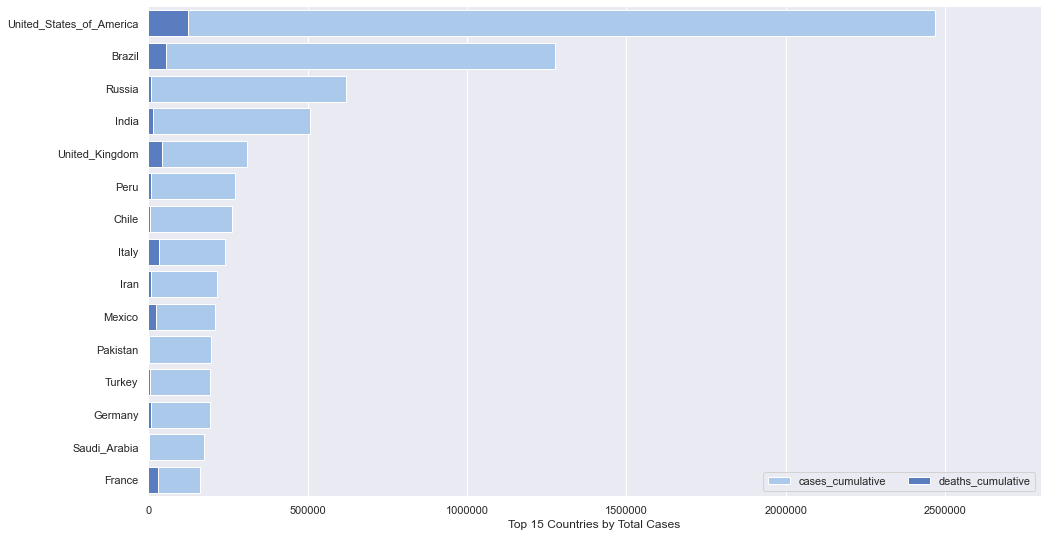

In [25]:
#seaborn horizontal bar plot for Top15_cases_cumulative
#displays cases_cumulative and deaths_cumulative

print("As we can see, the United States of America is leading the world in cumulative confirmed cases by a significant amount.")

sns.set(style="darkgrid")

#initialize matplotlib figure
f, ax = plt.subplots(nrows=1, ncols=1,figsize=(16,9))

#plot cases_cumulative
sns.set_color_codes("pastel")

sns.barplot(x="cases_cumulative", y="countriesAndTerritories", data = Top15_cases_cumulative,
            label="cases_cumulative", color="b")

# plot deaths_cumulative
sns.set_color_codes("muted")
sns.barplot(x="deaths_cumulative", y="countriesAndTerritories", data=Top15_cases_cumulative,
            label="deaths_cumulative", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)

plt.ticklabel_format(style='plain', axis='x')

ax.set(xlim=(0, 2800000), ylabel="",
       xlabel="Top 15 Countries by Total Cases")

sns.despine(left=True, bottom=True)

**Top 15 Countries by fatalityRatePerMillion as of 2020-06-27**

In [26]:
print("Top15_Deadliest sorts countries by fatality rate per million people. To qualify for this list, I chose countries with casesPerMillion and cases_cumulative greater than that of the dataset's median values.")

#sort by fatality rate per million
Top15_fatalityRatePerMillion = df4.copy().sort_values(by = 'fatalityRatePerMillion', ascending=False)

#filter for countries with casesPerMillion greater than the median 
#filter for countries with cases_cumulative greater than median 
Top15_Deadliest = Top15_fatalityRatePerMillion[(Top15_fatalityRatePerMillion['casesPerMillion'] > 
                             Top15_fatalityRatePerMillion['casesPerMillion'].median()) & 
                             (Top15_fatalityRatePerMillion['cases_cumulative'] > 
                             Top15_fatalityRatePerMillion['cases_cumulative'].median())
                              ].iloc[0:15].reset_index()

#Top15_Deadliest
Top15_Deadliest.index+=1
Top15_Deadliest['fatalityRatePerMillion'] = round(Top15_Deadliest['fatalityRatePerMillion']*100,2)

Top15_Deadliest sorts countries by fatality rate per million people. To qualify for this list, I chose countries with casesPerMillion and cases_cumulative greater than that of the dataset's median values.


,index,countriesAndTerritories,continentExp,dateRep,day,month,year,popData2019,cases_cumulative,deaths_cumulative,fatalityRate,casesPerMillion,deathsPerMillion,fatalityRatePerMillion
0,8799,France,Europe,2020-06-27,27,6,2020,67012883.0,162936,29778,0.182759,2431.413076,444.362318,0.182759
1,2606,Belgium,Europe,2020-06-27,27,6,2020,11455519.0,61106,9731,0.159248,5334.197429,849.459549,0.159248
2,12604,Italy,Europe,2020-06-27,27,6,2020,60359546.0,239961,34708,0.144640,3975.526920,575.020892,0.144640
3,24934,United_Kingdom,Europe,2020-06-27,27,6,2020,66647112.0,309360,43414,0.140335,4641.761521,651.401069,0.140335
4,15828,Mexico,America,2020-06-27,27,6,2020,127575529.0,208392,25779,0.123704,1633.479411,202.068533,0.123704


Based on this visualization, we can observe that COVID-19 has been very deadly in countries such as France, Belgium, and Italy.


[Text(0, 0.5, ''), (0.0, 20.0), Text(0.5, 0, 'Top 15 Deadliest Countries (%)')]

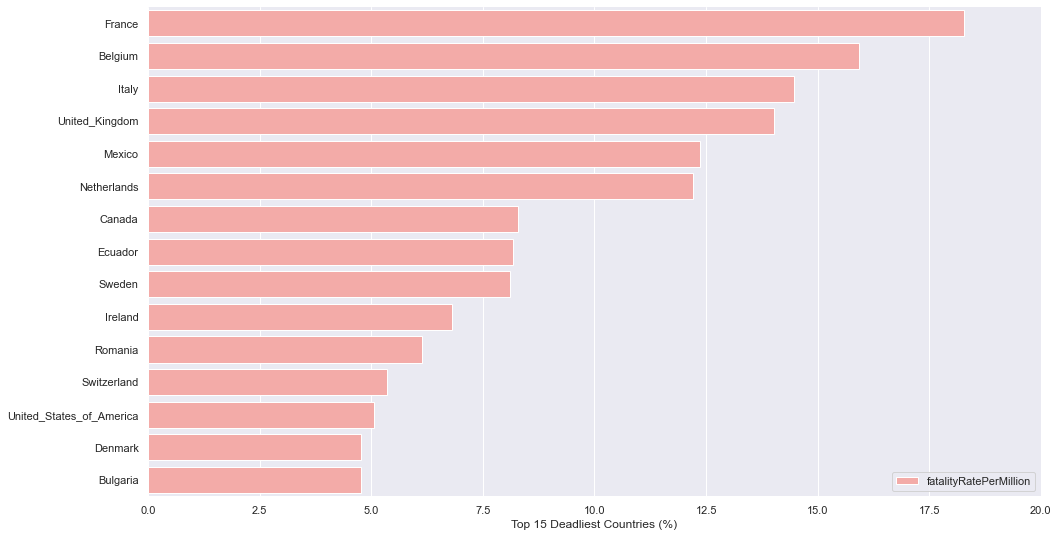

In [27]:
#seaborn horizontal bar plot for Top15_cases_cumulative
#displays fatalityRatePerMillion

print("Based on this visualization, we can observe that COVID-19 has been very deadly in countries such as France, Belgium, and Italy.")

sns.set(style="darkgrid")

#initialize matplotlib figure
f, ax = plt.subplots(nrows=1, ncols=1,figsize=(16,9))

#plot cases_cumulative
sns.set_color_codes("pastel")

sns.barplot(x="fatalityRatePerMillion", y="countriesAndTerritories", data = Top15_Deadliest,
            label="fatalityRatePerMillion", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)

ax.set(xlim=(0, 20), ylabel="",
       xlabel="Top 15 Deadliest Countries (%)")

sns.despine(left=True, bottom=True)

Countries that are Top 15 in cases_cumulative and fatalityRatePerMillion

In [28]:
d1 = Top15_cases_cumulative['countriesAndTerritories']
d2 = Top15_Deadliest['countriesAndTerritories']

d1[d1.isin(d2)]


1     United_States_of_America
5               United_Kingdom
8                        Italy
10                      Mexico
15                      France
Name: countriesAndTerritories, dtype: object

**Time Series**

In [29]:
df_timeseries = df3.fillna(0).copy()
temp_ts = df_timeseries.groupby(df_timeseries['dateRep']).sum()
temp_ts.drop(['day','month','year','popData2019','cases','deaths',
              'fatalityRate','casesPerMillion','deathsPerMillion',
              'fatalityRate','casesPerMillion','deathsPerMillion',
              'fatalityRatePerMillion'], axis = 1, inplace=True)
temp_ts.tail()

,cases_cumulative,deaths_cumulative
dateRep,,
2020-06-23,9063078,471701
2020-06-24,9228877,477278
2020-06-25,9400114,482472
2020-06-26,9581625,489188
2020-06-27,9522353,465553


[(0.0, 10000000.0),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'World Cases and Deaths ~ Date')]

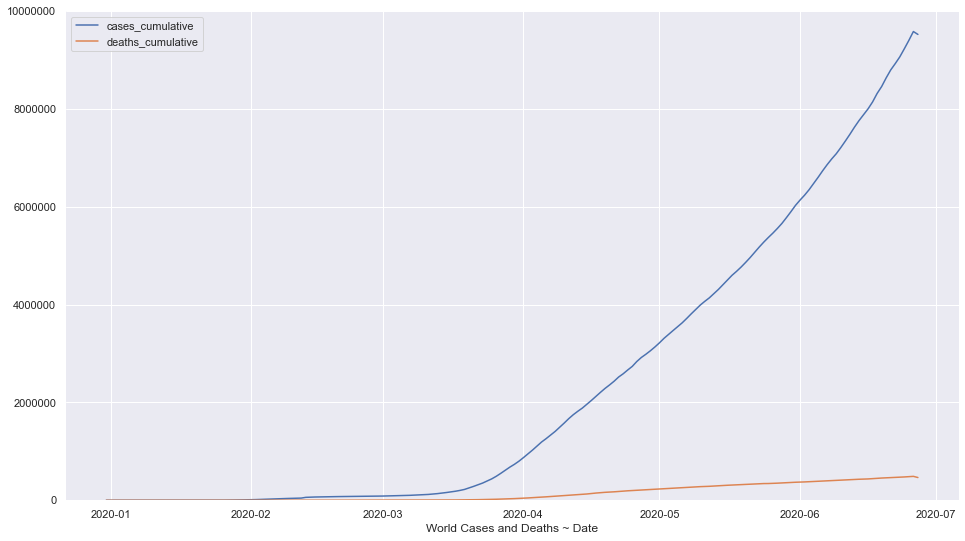

In [30]:
#World Cases and Deaths Timeseries 
f, ax = plt.subplots(nrows=1, ncols=1,figsize=(16,9))

sns.lineplot(data = temp_ts,
            style="event",
            markers=False,
            dashes=False)

plt.ticklabel_format(style='plain', axis='y')

ax.set(ylim=(0, 10000000), ylabel="",
       xlabel="World Cases and Deaths ~ Date")

sns.despine(left=True, bottom=True)

In [31]:
#what are the management and analytical questions associated with this problem? 

**Min-Max and Standard Scaling**

Select one variable and perform min-max and standard scaling in python 

In [32]:
df5 = df4[['countriesAndTerritories','cases_cumulative','fatalityRate']]
df5.head(1)

,countriesAndTerritories,cases_cumulative,fatalityRate
25312,United_States_of_America,2467837,0.050667


                  0             1
count  2.080000e+02  2.080000e+02
mean   3.416071e-17  1.366428e-16
std    1.002413e+00  1.002413e+00
min   -2.250853e-01 -8.801417e-01
25%   -2.238500e-01 -6.654777e-01
50%   -2.152293e-01 -2.886388e-01
75%   -1.446098e-01  3.301454e-01
max    1.190910e+01  6.237844e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcad776d3d0>,
      dtype=object)

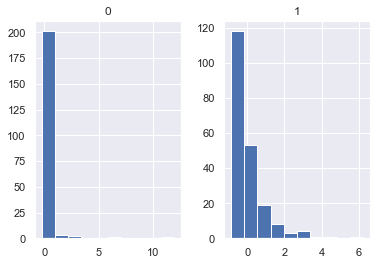

In [33]:
#Perform Standard Scaling

df6 = df5[['cases_cumulative','fatalityRate']]

data = df6.to_numpy()

# define standard scaler
scaler = StandardScaler()

# transform data
scaled = scaler.fit_transform(data)
dataset1 = pd.DataFrame(scaled)

print(dataset1.describe())

dataset1.hist()
plt.show()

                0           1
count  208.000000  208.000000
mean     0.018550    0.123650
std      0.082611    0.140828
min      0.000000    0.000000
25%      0.000102    0.030158
50%      0.000812    0.083100
75%      0.006632    0.170032
max      1.000000    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcad961b5b0>,
      dtype=object)

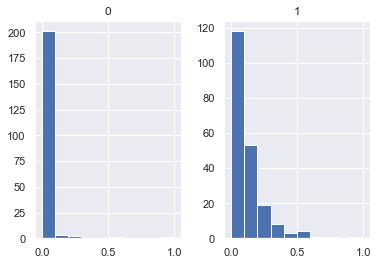

In [34]:
#Perform Min-Max Scaling

trans = MinMaxScaler()

data2 = trans.fit_transform(data)

dataset2 = pd.DataFrame(data2)

print(dataset2.describe())

dataset2.hist()
plt.show()

In [35]:
from sklearn.datasets import fetch_california_housing

print(__doc__)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

X = X_full[:, [0, 5]]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

Automatically created module for IPython interactive environment


In [36]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')